# Titanic data set

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set_style('whitegrid')

In [5]:
titanic = pd.read_csv('C:\\Users\\hitesh\\Downloads\\train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#titanic_columns = [['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
#titanic_columns

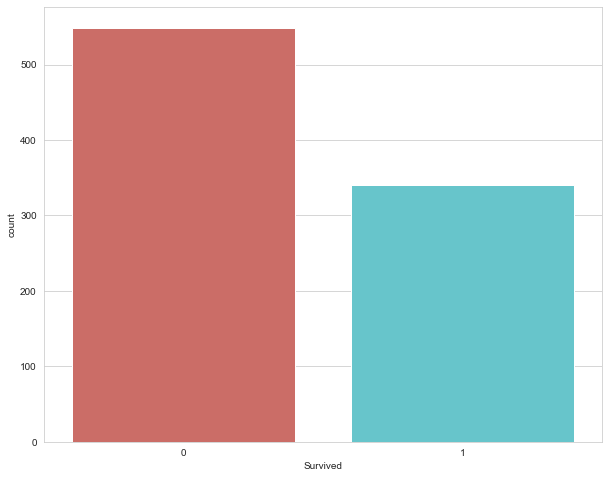

In [36]:
sns.countplot(x='Survived',data = titanic,palette='hls')

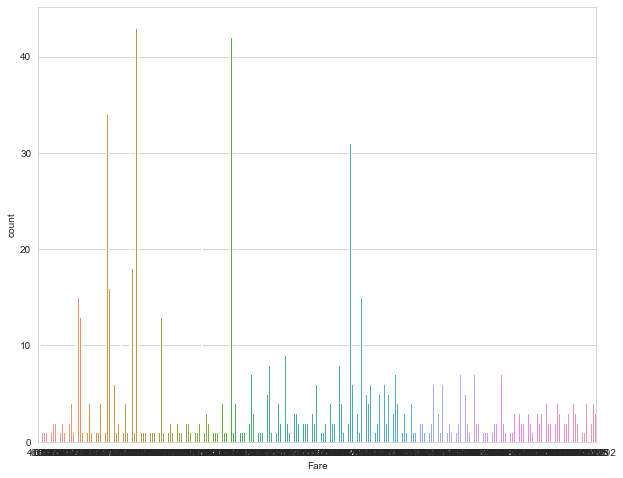

In [8]:
sns.countplot(x='Fare',data = titanic)

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


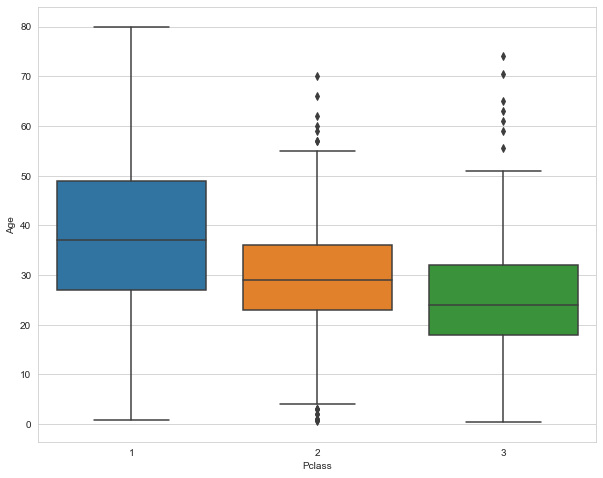

In [13]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [14]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
titanic['Age'] = titanic[['Age','Pclass']].apply(age_approx,axis= 1)

### titanic.isnull().sum()

# 

In [17]:
titanic.dropna(inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
gender = pd.get_dummies(titanic['Sex'],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [19]:
embark_location = pd.get_dummies(titanic['Embarked'],drop_first =True)
embark_location

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [20]:
titanic.drop(['Sex','Embarked'],axis=1,inplace = True)

In [21]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [22]:
titanic = pd.concat([titanic,gender,embark_location],axis = 1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


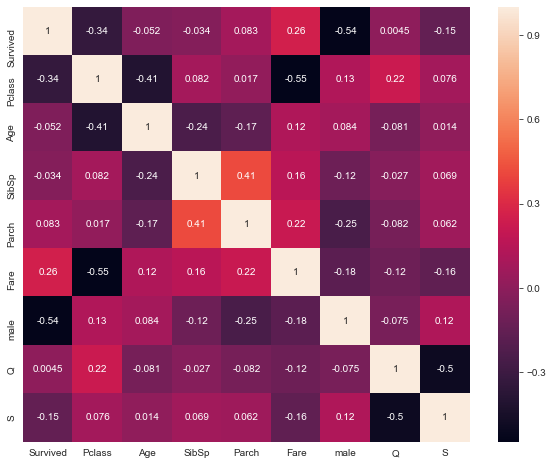

In [23]:
sns.heatmap(titanic.corr(),annot=True)

In [24]:
titanic.drop(['Pclass','Fare'],axis = 1,inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


In [26]:
titanic.describe()

,Survived,Age,SibSp,Parch,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.019314,0.524184,0.382452,0.649044,0.086614,0.724409
std,0.486260,13.209814,1.103705,0.806761,0.477538,0.281427,0.447063
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,26.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,36.500000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000


In [27]:
titanic.corr()

,Survived,Age,SibSp,Parch,male,Q,S
Survived,1.000000,-0.052051,-0.034040,0.083151,-0.541585,0.004536,-0.151777
Age,-0.052051,1.000000,-0.242807,-0.170089,0.083730,-0.080875,0.013598
SibSp,-0.034040,-0.242807,1.000000,0.414542,-0.116348,-0.026692,0.069438
Parch,0.083151,-0.170089,0.414542,1.000000,-0.247508,-0.081585,0.061512
male,-0.541585,0.083730,-0.116348,-0.247508,1.000000,-0.075217,0.121405
Q,0.004536,-0.080875,-0.026692,-0.081585,-0.075217,1.000000,-0.499261
S,-0.151777,0.013598,0.069438,0.061512,0.121405,-0.499261,1.000000


In [28]:
X = titanic.iloc[:,1:7].values
y = titanic.iloc[:,0].values
#X
#y

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 25)


In [30]:
logreg = LogisticRegression(C=1.0,solver='liblinear')
logreg.fit(X_train,y_train)
#cofusion_matrix

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_pred)

0.5307692307692308

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[137,  27],
       [ 34,  69]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       164
           1       0.72      0.67      0.69       103

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267

